# Load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('Customer_Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Data Cleaning: Check for missing values, outliers, and inconsistencies.

In [6]:
# Check for missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

22

In [8]:
# Summary statistics for numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Frequency counts for categorical features
for column in df.select_dtypes(include='object').columns:
    print("\n", column)
    print(df[column].value_counts())


 gender
Male      3555
Female    3488
Name: gender, dtype: int64

 Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

 Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

 PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

 DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

 TechSupport
No                     3473
Yes                    2044
No internet ser

# Data Visualization: Visualize the data to identify patterns and relationships.

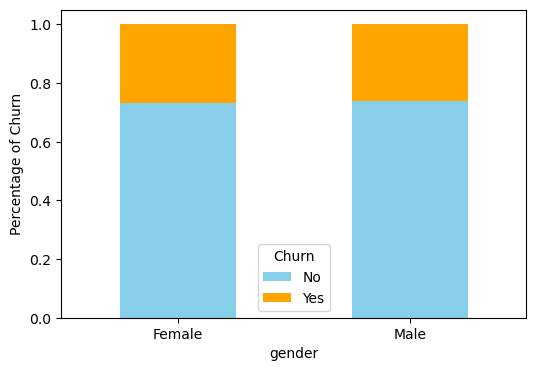

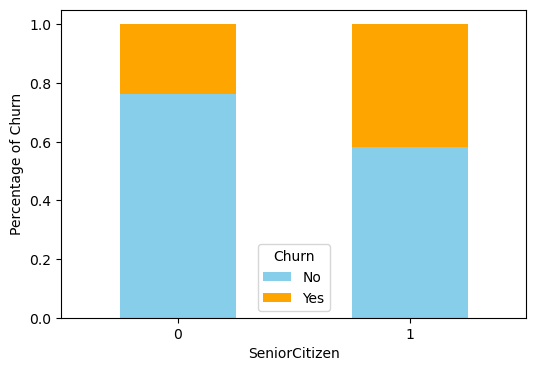

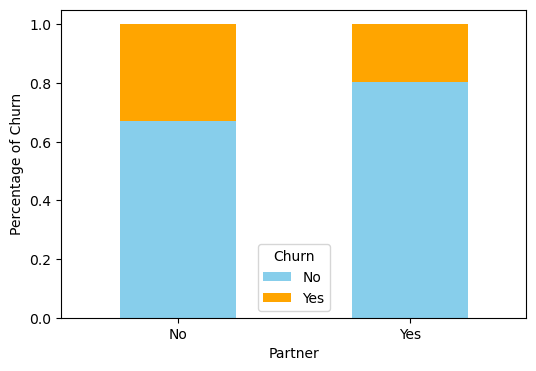

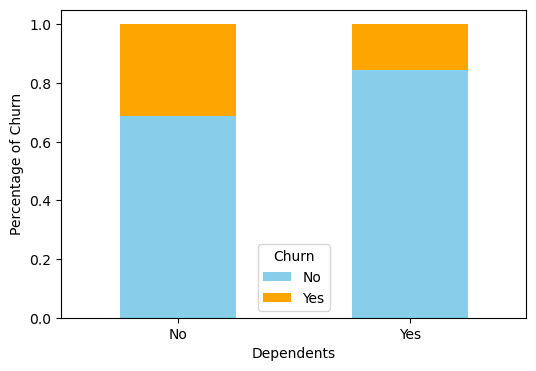

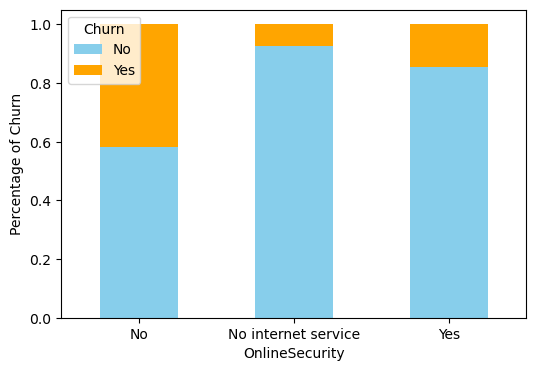

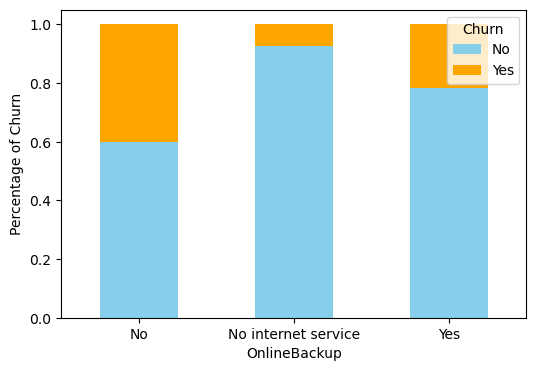

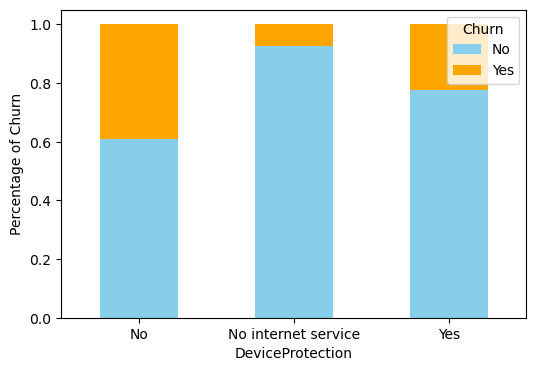

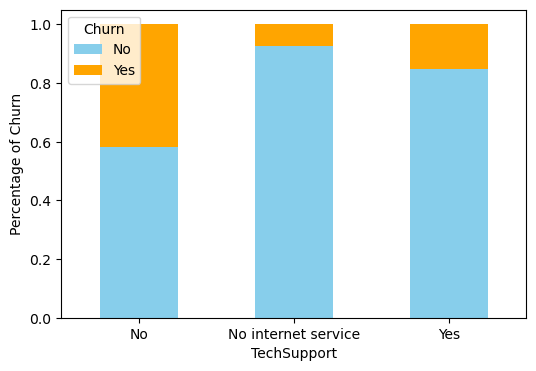

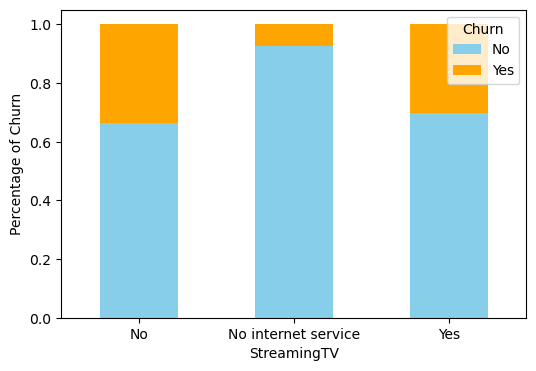

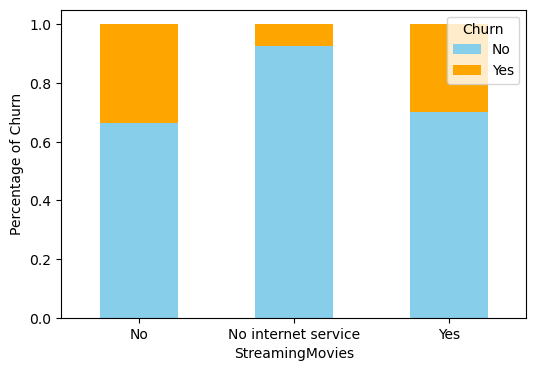

In [10]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax=ax, color=["skyblue", "orange"])  # Change colors as desired
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Percentage of Churn')

stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")


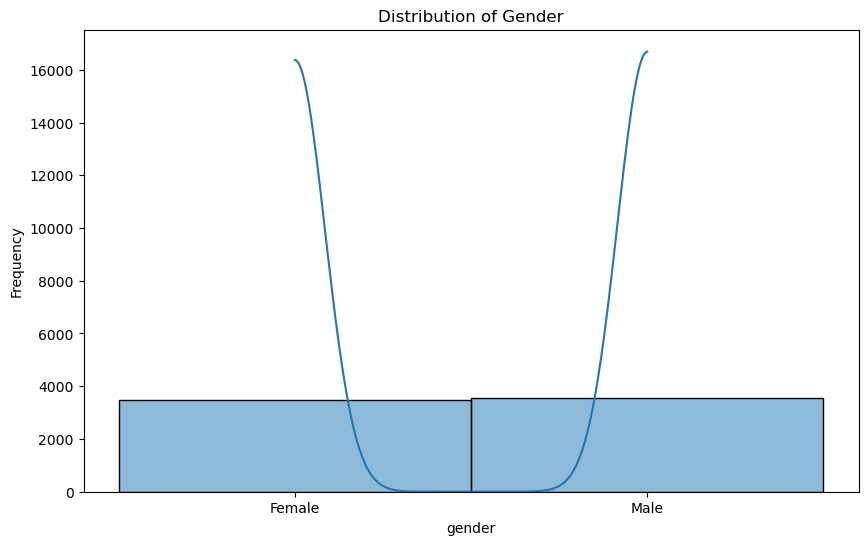

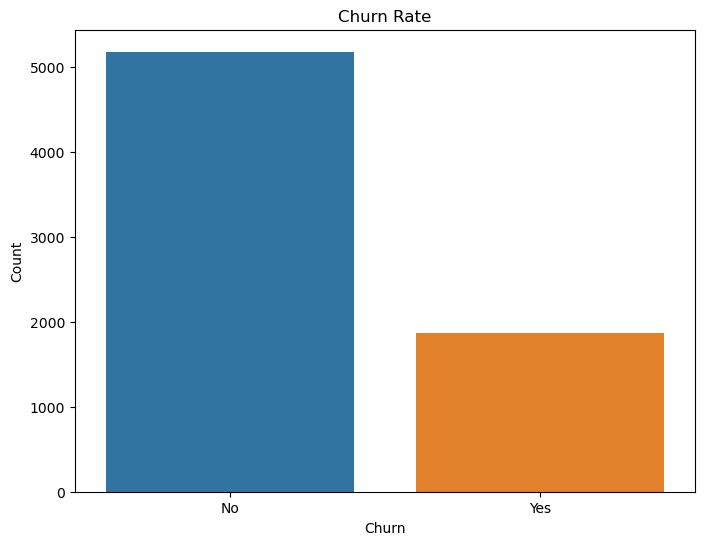

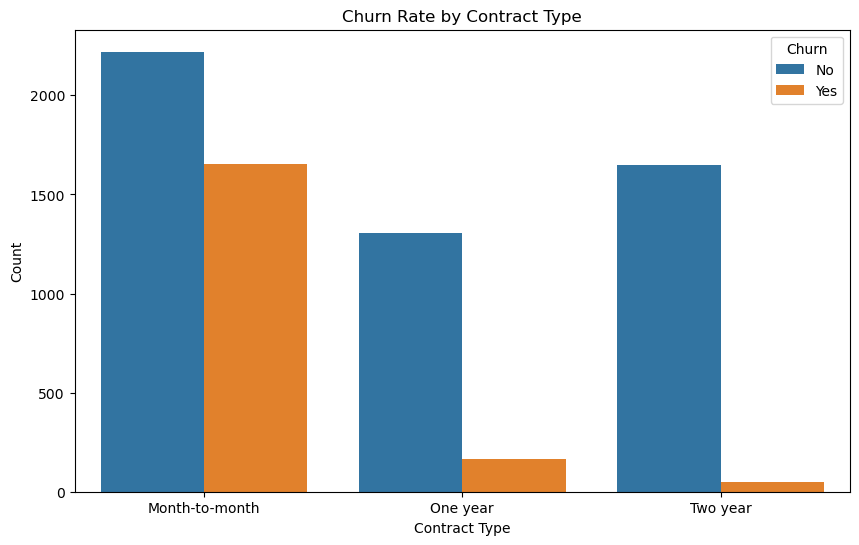

C:\Users\Shams\AppData\Local\Temp\ipykernel_16780\1785360152.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


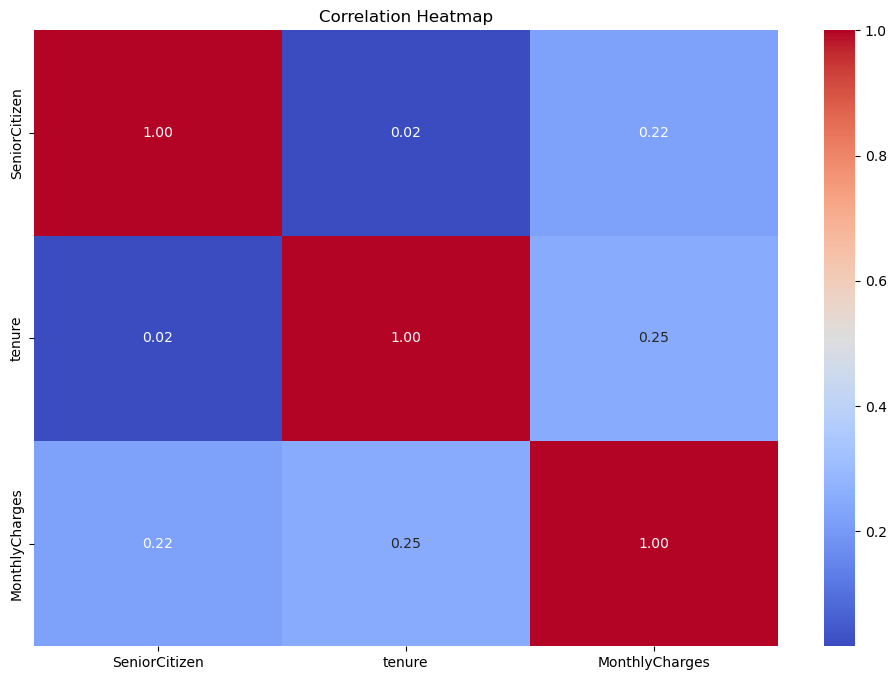

In [11]:
# Visualize distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['gender'], bins=20, kde=True)
plt.title('Distribution of Gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.show()

# Visualize churn rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualize churn rate across different segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Ignore all warning messages
warnings.filterwarnings("ignore")

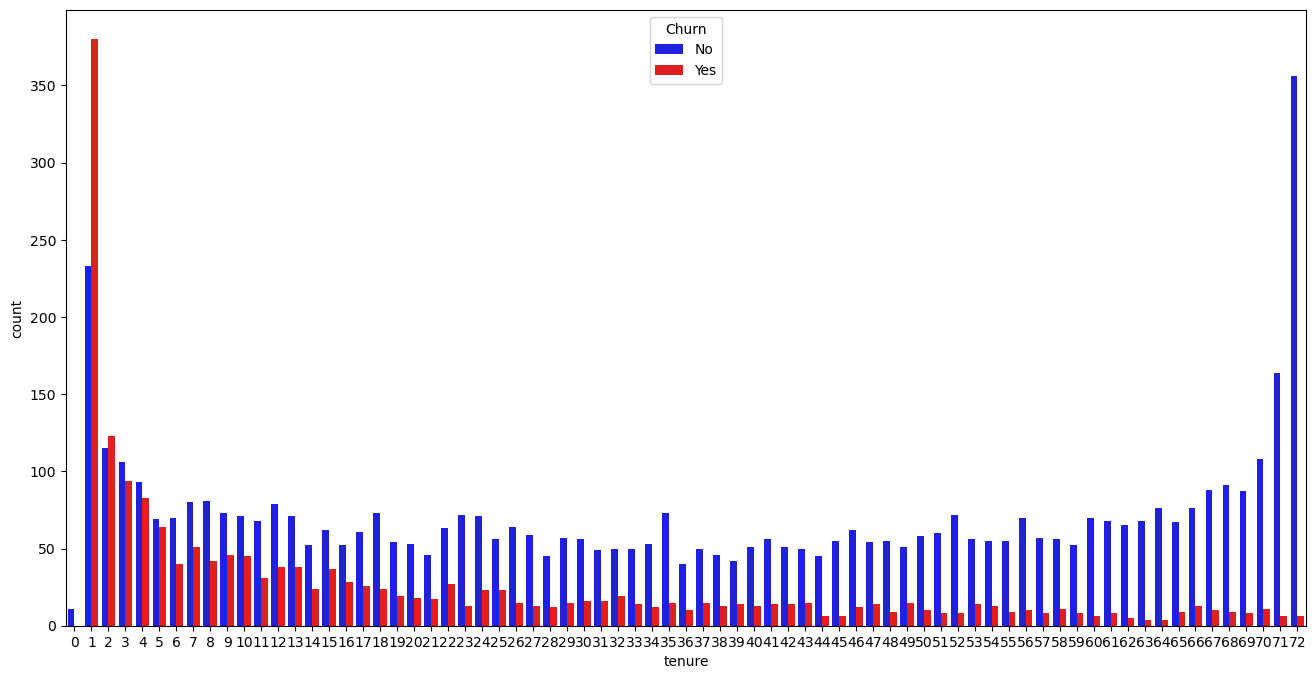

In [12]:
plt.figure(figsize=(16, 8))
sns.countplot(x="tenure", hue="Churn", data=df, palette={"No": "blue", "Yes": "red"})
plt.show()

In [13]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6
df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [14]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

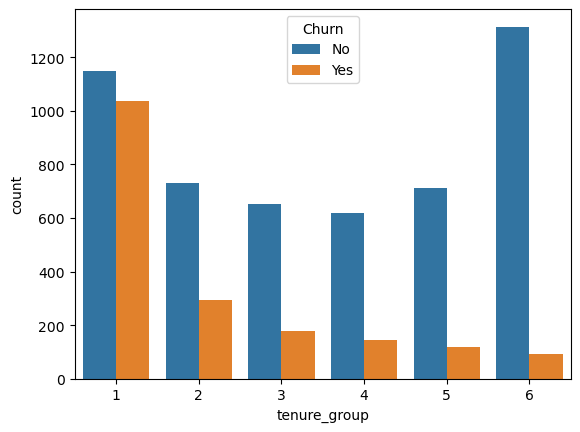

In [15]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

# "Predicting Customer Churn: A Survival Regression Approach"

In [16]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [17]:
regression_df = datapreparation('Customer_Churn.csv')
regression_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


# Survival Regression Ananlysis using Cox Proportional Hazard model

In [18]:
from lifelines import CoxPHFitter

# Create an instance of the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model to the data
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

# Print the summary of the model
print(cph.print_summary())


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2024-03-25 16:08:21 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.85   0.

None


In [19]:
from lifelines.utils import concordance_index

# Calculate the concordance index
c_index = concordance_index(regression_df['tenure'], -cph.predict_partial_hazard(regression_df), regression_df['Churn'])

print("Concordance Index (C-index):", c_index)


Concordance Index (C-index): 0.9285636735265471


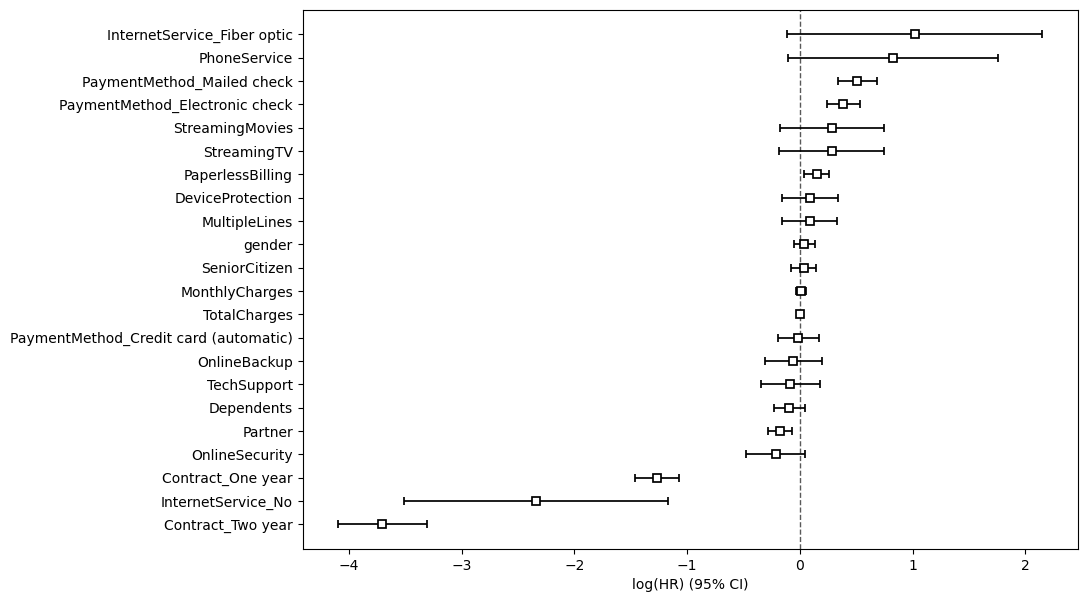

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
cph.plot(ax=ax)
plt.show()


# Data Preparation

In [21]:
df = datapreparation(filepath="Customer_Churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [22]:
df.isnull().any()

gender                                   False
SeniorCitizen                            False
Partner                                  False
Dependents                               False
tenure                                   False
PhoneService                             False
MultipleLines                            False
OnlineSecurity                           False
OnlineBackup                             False
DeviceProtection                         False
TechSupport                              False
StreamingTV                              False
StreamingMovies                          False
PaperlessBilling                         False
MonthlyCharges                           False
TotalCharges                             False
Churn                                    False
InternetService_Fiber optic              False
InternetService_No                       False
Contract_One year                        False
Contract_Two year                        False
PaymentMethod

# Model Building

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

After running this code, train will contain 80% of the data, and test will contain 20% of the data, with the split being stratified based on the Churn column.

In [24]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf='coefficients'):
    """
    Function to fit a classification algorithm, make predictions, evaluate performance,
    and visualize results including confusion matrix, ROC curve, and feature importances.

    Parameters:
    - algo: Classification algorithm object (e.g., RandomForestClassifier)
    - training_x: Features of the training set
    - training_y: Target variable of the training set
    - testing_x: Features of the testing set
    - testing_y: Target variable of the testing set
    - cols: Column names of the features
    - cf: Type of coefficient/feature importance ('coefficients' or 'features')

    Returns:
    - None
    """
    # Fit the algorithm to the training data
    algo.fit(training_x, training_y)

    # Make predictions on the testing data
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:, 1]

    # Get coefficients or feature importances
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel(), columns=["Coefficient"])
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_, columns=["Feature Importance"])

    # Create a DataFrame to store coefficients or feature importances
    column_df = pd.DataFrame(cols, columns=["Feature"])
    coef_sumry = pd.concat([coefficients, column_df], axis=1)
    coef_sumry = coef_sumry.sort_values(by="Coefficient" if cf == "coefficients" else "Feature Importance", ascending=False)

    # Print model summary and evaluation metrics
    print(algo)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    plt.figure(figsize=(12, 12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt="d", annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    # Plot ROC curve
    model_roc_auc = roc_auc_score(testing_y, probabilities)
    print("Area under curve:", model_roc_auc, "\n")
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label="AUC: %.3f" % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # Plot feature importances
    plt.subplot(212)
    sns.barplot(x=coef_sumry["Feature"], y=coef_sumry["Coefficient" if cf == "coefficients" else "Feature Importance"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")

    plt.show()


# Hyperparameters Tuning

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best score grid 1: 0.5671662837071084
Best parameters grid 1: {'max_features': 'log2', 'n_estimators': 900}
Best score grid 2: 0.5826841895407789
Best parameters grid 2: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score grid 3: 0.5766293339687835
Best parameters grid 3: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 1300}
Best score grid 4: 0.580948580900343
Best parameters grid 4: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


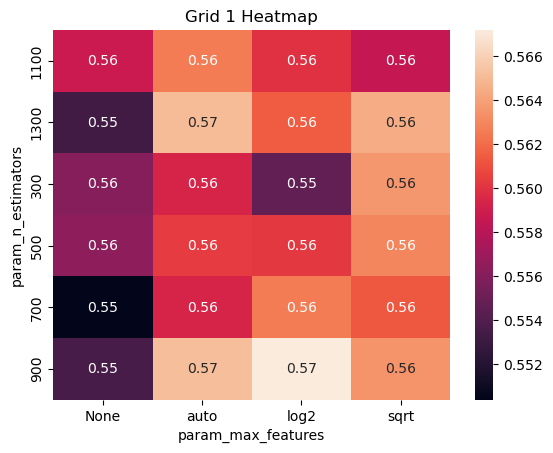

In [26]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define param_grid for each grid
param_grid1 = {
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [300, 500, 700, 900, 1100, 1300]
}

param_grid2 = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid3 = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'n_estimators': [300, 500, 700, 900, 1100, 1300]
}

param_grid4 = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_estimators': [300, 500, 700, 900, 1100, 1300]
}

# Create grid search objects for each grid
grid1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid3 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid4 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring='f1')

# Fit each grid search object to the data
grid1.fit(train_X, train_y)
grid2.fit(train_X, train_y)
grid3.fit(train_X, train_y)
grid4.fit(train_X, train_y)

# Best scores and parameters for each grid
print("Best score grid 1:", grid1.best_score_)
print("Best parameters grid 1:", grid1.best_params_)
print("Best score grid 2:", grid2.best_score_)
print("Best parameters grid 2:", grid2.best_params_)
print("Best score grid 3:", grid3.best_score_)
print("Best parameters grid 3:", grid3.best_params_)
print("Best score grid 4:", grid4.best_score_)
print("Best parameters grid 4:", grid4.best_params_)

# Visualize mean test scores for each parameter combination in grid 1
dt1 = pd.DataFrame(grid1.cv_results_)
dt1['param_max_features'] = dt1['param_max_features'].astype(str)
dt1['param_n_estimators'] = dt1['param_n_estimators'].astype(str)
table1 = pd.pivot_table(dt1, values='mean_test_score', index='param_n_estimators', columns='param_max_features')
sns.heatmap(table1, annot=True)
plt.title('Grid 1 Heatmap')
plt.show()



RandomForestClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=10, max_features='auto', min_samples_split=8,
                       n_estimators=1000)

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.59      0.66      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

Accuracy Score: 0.78708303761533
Area under curve: 0.8484021803714898 



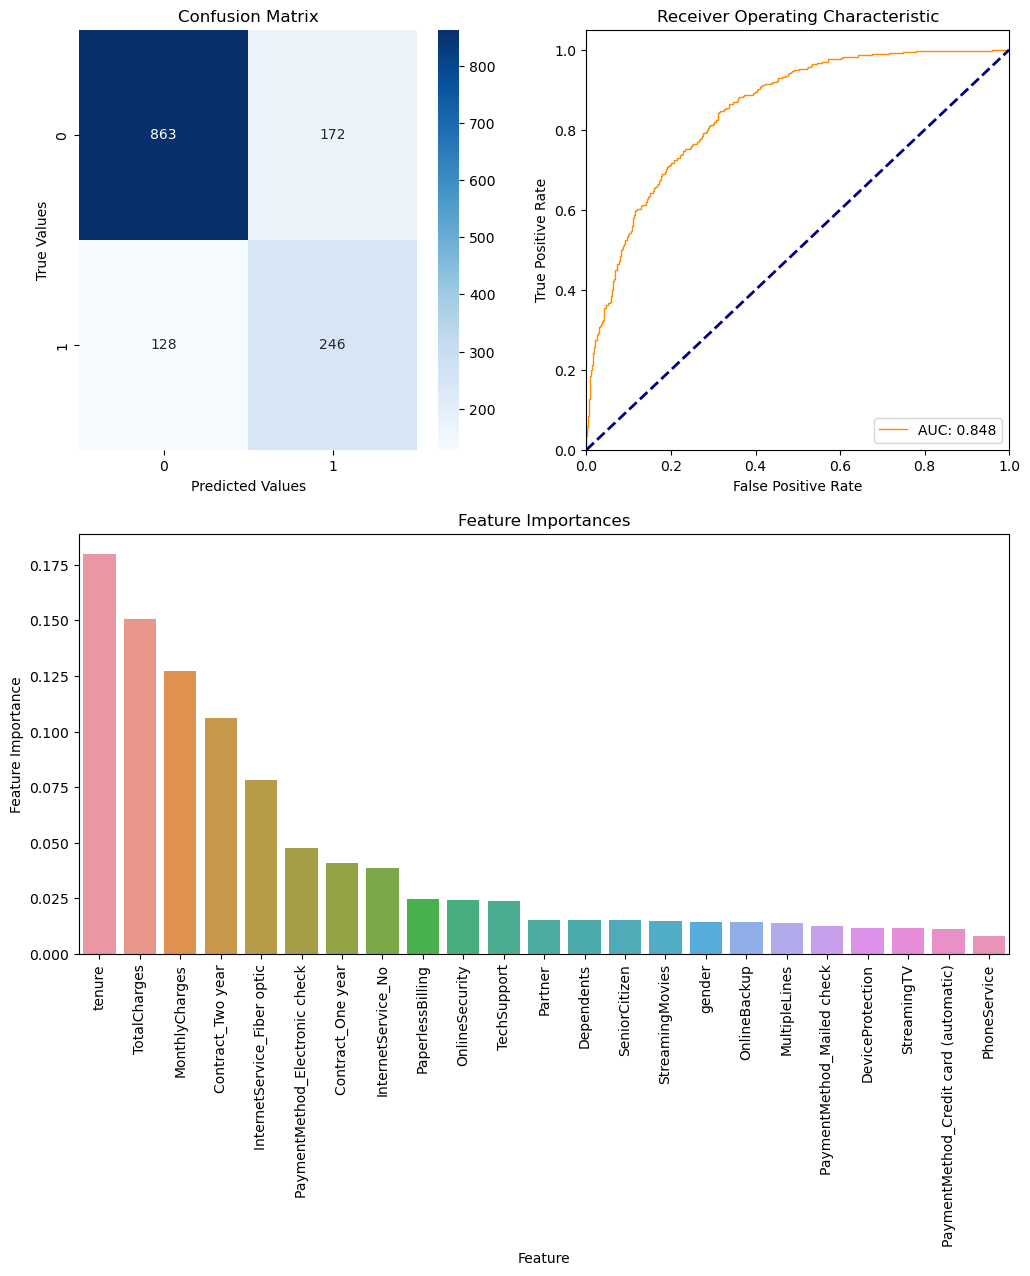

In [27]:
# Ignore all warning messages
warnings.filterwarnings("ignore")


from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier with the specified parameters
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 2},
                                criterion='entropy', max_depth=10, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_samples_leaf=1, min_samples_split=8,
                                min_weight_fraction_leaf=0.0, n_estimators=1000,
                                n_jobs=None, oob_score=False, random_state=None,
                                verbose=0, warm_start=False)

# Splitting the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=111, stratify=y)

# Features (excluding the target variable)
x = train_X.columns

# Call churn_prediction function to fit the model, make predictions, and evaluate performance
churn_prediction(model, train_X, train_y, test_X, test_y, x, "features")



In [28]:
# Ignore all warning messages
warnings.filterwarnings("ignore")

train_scores = cross_val_score(model, train_X, train_y, cv=5, scoring='f1')

# Print the F1 scores
print("F1 scores:", train_scores)

F1 scores: [0.60371517 0.66773163 0.61587302 0.58609272 0.64050235]


In [29]:
np.mean(train_scores)

0.6227829771128963

# Explaining the model

In [30]:
import pickle
import eli5
from eli5.sklearn import PermutationImportance

# test_x should contain the features of test set
# test_y should contain the target variable of test set

# Save the model using pickle
pickle.dump(model, open('model.pkl', 'wb'))

# Load the model from the saved file
loaded_model = pickle.load(open('model.pkl', 'rb'))

# Calculate feature importances using PermutationImportance
perm = PermutationImportance(loaded_model, random_state=1).fit(test_X, test_y)

# Show feature importances
eli5.show_weights(perm, feature_names=test_X.columns.tolist())



Weight,Feature
0.0187 ± 0.0046,InternetService_Fiber optic
0.0058 ± 0.0103,Contract_Two year
0.0053 ± 0.0059,OnlineSecurity
0.0040 ± 0.0067,InternetService_No
0.0026 ± 0.0132,Contract_One year
0.0021 ± 0.0089,PaperlessBilling
0.0020 ± 0.0062,PaymentMethod_Electronic check
0.0017 ± 0.0102,tenure
0.0010 ± 0.0046,MonthlyCharges
0.0007 ± 0.0013,OnlineBackup


# Machine Learning Model Development

In [31]:
# Ignore all warning messages
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, train_X, train_y, cv=5, scoring='accuracy')  # Using accuracy as the evaluation metric
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

# Train the best-performing model on the entire training set
best_model = RandomForestClassifier()  # Change this to the model with the highest mean accuracy
best_model.fit(train_X, train_y)


Logistic Regression: Mean Accuracy: 0.8032, Standard Deviation: 0.0110
Decision Tree: Mean Accuracy: 0.7242, Standard Deviation: 0.0103
Random Forest: Mean Accuracy: 0.7840, Standard Deviation: 0.0068
Gradient Boosting: Mean Accuracy: 0.7938, Standard Deviation: 0.0121


RandomForestClassifier()

# Model Evaluation

In [42]:
# Ignore all warning messages
warnings.filterwarnings("ignore")

# Define the evaluation function
def evaluate_model(model, test_X, test_y):
    # Train the model
    model.fit(train_X, train_y)
    # Make predictions
    predictions = model.predict(test_X)
    probabilities = model.predict_proba(test_X)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    roc_auc = roc_auc_score(test_y, probabilities)    

    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Return evaluation metrics
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Define the models

models = {
    'Logistic Regression': LogisticRegression(C=100, max_iter= 100, penalty= 'l2', solver= 'liblinear'),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=5),
    'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto', min_samples_leaf=4, min_samples_split=10, n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate= 0.2, max_depth= 3, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
}

# Create a DataFrame to store evaluation results

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}:")
    model_results = evaluate_model(model, test_X, test_y)
    model_results['Model'] = name
    results = results.append(model_results, ignore_index=True)
print("")
print("***************************************All Result***************************************")
# Display results as a table
print(results)


Evaluating Logistic Regression:
Evaluating Decision Tree:
Evaluating Random Forest:
Evaluating Gradient Boosting:

***************************************All Result***************************************
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.806955   0.671141  0.534759  0.595238  0.854509
1        Decision Tree  0.782115   0.623616  0.451872  0.524031  0.780944
2        Random Forest  0.801987   0.673993  0.491979  0.568779  0.847485
3    Gradient Boosting  0.807665   0.679443  0.521390  0.590015  0.852582


# The importance of feature importance scores

In [43]:
import pandas as pd
# Predict churn using the trained model
predictions = model.predict(test_X)
# Calculate feature importance scores if applicable
if hasattr(model, 'feature_importances_'):
    feature_importance_scores = dict(zip(test_X.columns, model.feature_importances_))
    feature_importance_df = pd.DataFrame.from_dict(feature_importance_scores, orient='index', columns=['Importance'])
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importance Scores:")
    print(feature_importance_df)
else:
    print("Feature importance scores are not available for this model.")


Feature Importance Scores:
                                       Importance
Contract_Two year                        0.193203
tenure                                   0.158537
TotalCharges                             0.140014
InternetService_Fiber optic              0.107317
MonthlyCharges                           0.094276
PaymentMethod_Electronic check           0.061394
Contract_One year                        0.060325
PaperlessBilling                         0.050339
OnlineSecurity                           0.028709
InternetService_No                       0.028592
Dependents                               0.013631
StreamingMovies                          0.011057
TechSupport                              0.009124
PhoneService                             0.007931
MultipleLines                            0.007792
PaymentMethod_Mailed check               0.007144
SeniorCitizen                            0.007018
OnlineBackup                             0.004471
StreamingTV            

# Predict Customer Churn

In [44]:
# The churn predictions along with corresponding feature values
for i, prediction in enumerate(predictions):
    print(f"            Prediction {i + 1}:      Churn: {prediction},\n***Features:***********************************\n{test_X.iloc[i]}\n\n")

            Prediction 1:      Churn: 0,
***Features:***********************************
gender                                      0.00
SeniorCitizen                               1.00
Partner                                     1.00
Dependents                                  0.00
tenure                                     51.00
PhoneService                                1.00
MultipleLines                               1.00
OnlineSecurity                              1.00
OnlineBackup                                0.00
DeviceProtection                            1.00
TechSupport                                 0.00
StreamingTV                                 0.00
StreamingMovies                             1.00
PaperlessBilling                            1.00
MonthlyCharges                             93.65
TotalCharges                             4839.15
InternetService_Fiber optic                 1.00
InternetService_No                          0.00
Contract_One year            

# Recommendations

Recommendations:

1. Implement a targeted loyalty program for high-risk customers identified by the predictive model. Offer incentives or discounts to encourage retention.

2. Enhance the onboarding process for new customers by providing personalized tutorials or on-demand support. Improve the initial user experience to increase engagement and reduce early churn.

3. Investigate and address common pain points or issues reported by customers through feedback channels. Prioritize improvements that directly impact customer satisfaction and loyalty.